# EE 524  PROJECT SUBMISSION | AVI KHANDELWAL, 204102301

## Implementations -
### Part A. Exploratory Data Analysis (EDA)
### Part B. K Nearest Neibours Algorithm (KNN)
### Part C. Principal Component Analysis (PCA)
### Part D. t-distributed stochastic neighbor embedding (t-SNE)

In [861]:
#Importing required packages

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import linalg as la


data1 = pd.read_csv("C:/Users/avikh/Desktop/SPML_Sem1/ML/Lab/d1.csv") # Reading white wine data
data2 = pd.read_csv("C:/Users/avikh/Desktop/SPML_Sem1/ML/Lab/d2.csv") # Reading red wine data
# Adding another feature descibing the color of wine
data1['color']='White'
data2['color']='Red'
df = data1.append(data2, ignore_index = True) 
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red


## INTRODUCTION

### The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine whose data has been taken from UCI Machine learning repository. Red wine data contains 1599 entries,11 features and white wine contains 4898 entries,11 features. Both the datasets have been combined to create a single data set of 6497 entries and 11 features.

### Attribute Information:

#### 1 - fixed acidity
#### 2 - volatile acidity
#### 3 - citric acid
#### 4 - residual sugar
#### 5 - chlorides
#### 6 - free sulfur dioxide
#### 7 - total sulfur dioxide
#### 8 - density
#### 9 - pH
#### 10 - sulphates
#### 11 - alcohol
#### 12 - quality (score between 0 and 10)
#### 13 - color




## Part A. EXPLORATORY DATA ANALYSIS (Tools used)

### EDA is the process of figuring out what the data can tell us and using that to find patterns, relationships, or anomalies for subsequent analysis. 

### 1. Stastical parameters of data
### 2. Count plots corresponding to quality
### 3. Heatmaps 
### 4. Box plots
### 5. Histogram plots
### 6. Pairwise plot
### 7. Violin plot

In [862]:
#1. Statistical parameters of data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### The table above gives us information about the statistics of the dataset. Having this information we can comment on the mean, SD, minimum, maximum, first, second and third quartile of individual features in the datset. 

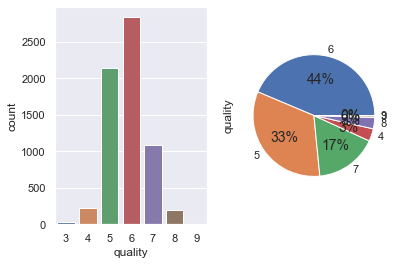

In [863]:
#2. Count plot corresponding to quality
plt.subplot(1,2,1)
sns.countplot(x='quality',data=df)

plt.subplot(1,2,2)
df['quality'].value_counts().plot.pie(autopct="%1.0f%%")

### From above we can find out the number of wines corresponding to the quality. From bar graph we can see that highest number of wines correspond to quality 6 followed by 5,7,4,8,3 and 9. Pie chart gives us the same information expressing in percentage

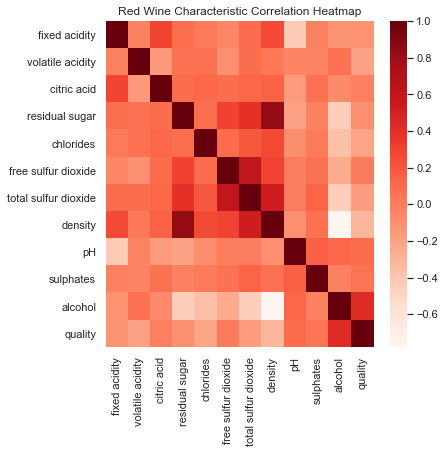

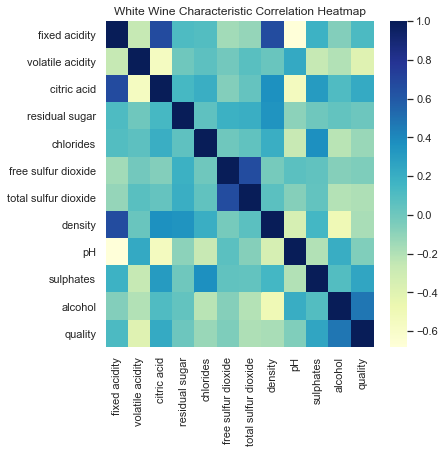

In [865]:
#3. Heatmaps

plt.figure(1,figsize=(6,6))
ax = plt.axes()
ax.set_title("Red Wine Characteristic Correlation Heatmap")
corr = data1.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values, cmap="Reds")


plt.figure(2,figsize=(6,6))
ax = plt.axes()
ax.set_title("White Wine Characteristic Correlation Heatmap")
corr = data2.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap="YlGnBu")
plt.show()

### The above heatmaps qualitatively tell us about the corelation of the features, the darker the box is the highly the 2 features are corelated to one another for instance density is highly corelated with amount of sulpher dioxide and similarly alcohol content is negatively corelated with the residual sugar (for both wines). 

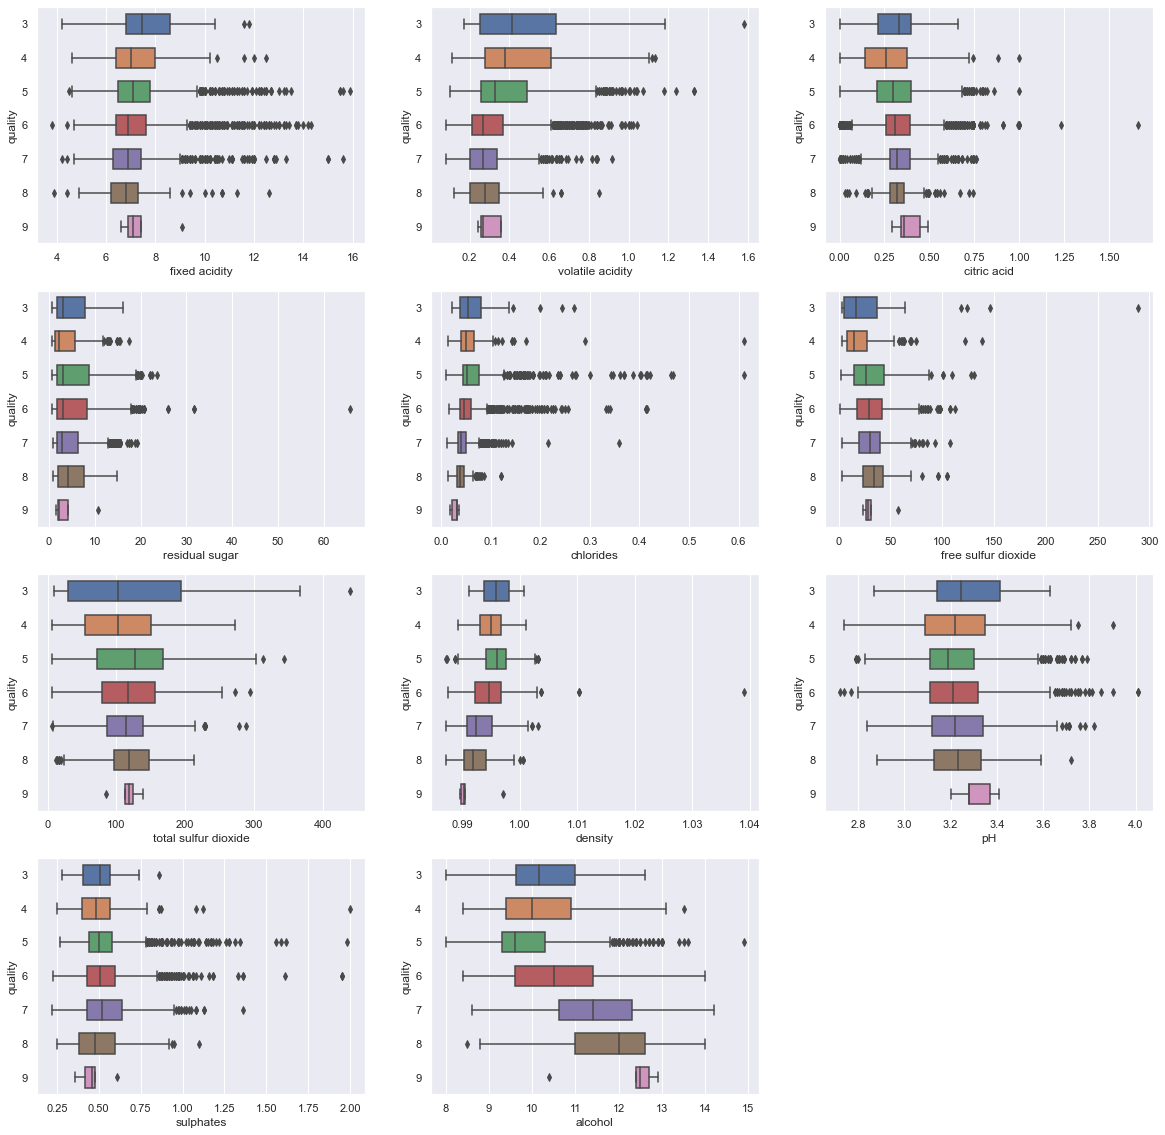

In [867]:
#4. Box plots
i = 1
plt.figure(figsize=(20,20))
for col in df.columns.values[0:12]:
    plt.subplot(4,3,i)
    sns.boxplot(x=col, y="quality", width=.6,data=df,orient="h")
    i = i+1
    if i>11:
        break

### Boxplots are a measure of how well distributed the data in a data set is. It divides the data set into three quartiles. This graphs represents the minimum, maximum, median, first quartile and third quartile of any given feature in the data set against various quality values. The dots indicate the outliers in the data.

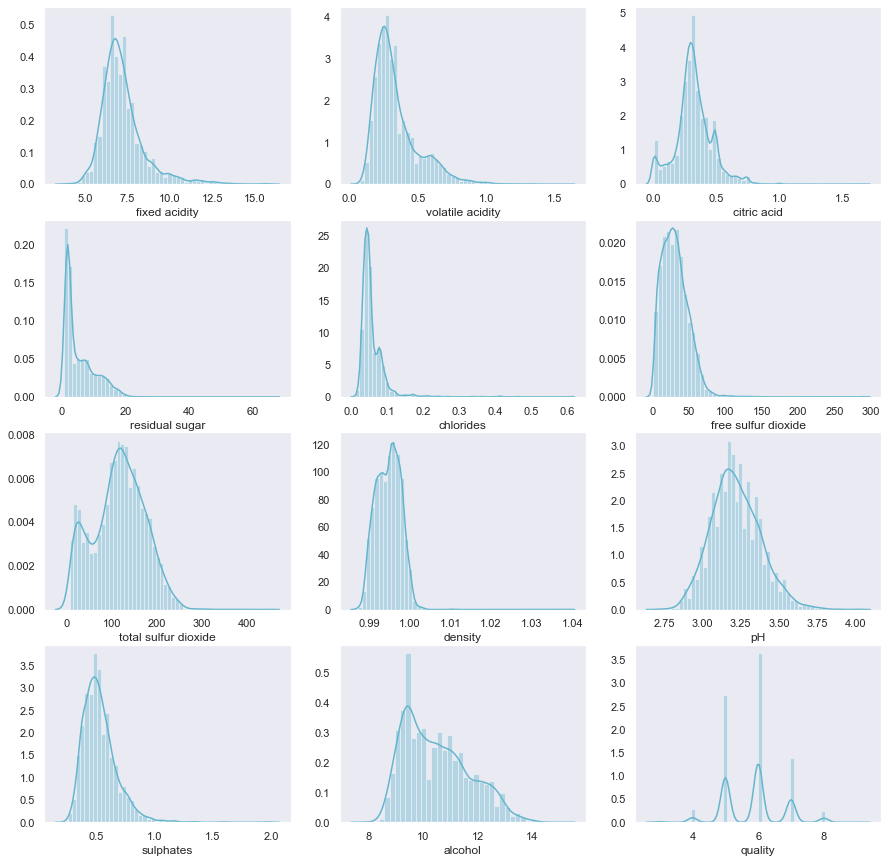

In [871]:
#5 Histogram plots
i = 1
plt.figure(figsize=(15,15))
for col in df.columns.values[0:12]:
    plt.subplot(4,3,i)
    sns.distplot(df[col],color='c',norm_hist=True)
    plt.grid()
    i = i+1

### The above histogram gives us information about the probability density values of the various feature vectors in the data set. For instance in any of the given red/white wine, it is highly likely that alcohol content is around 9.5, similarly the total sulphur dieoxide is most likely to be in levels 100-150 which is visible from the histograms as shown above. 

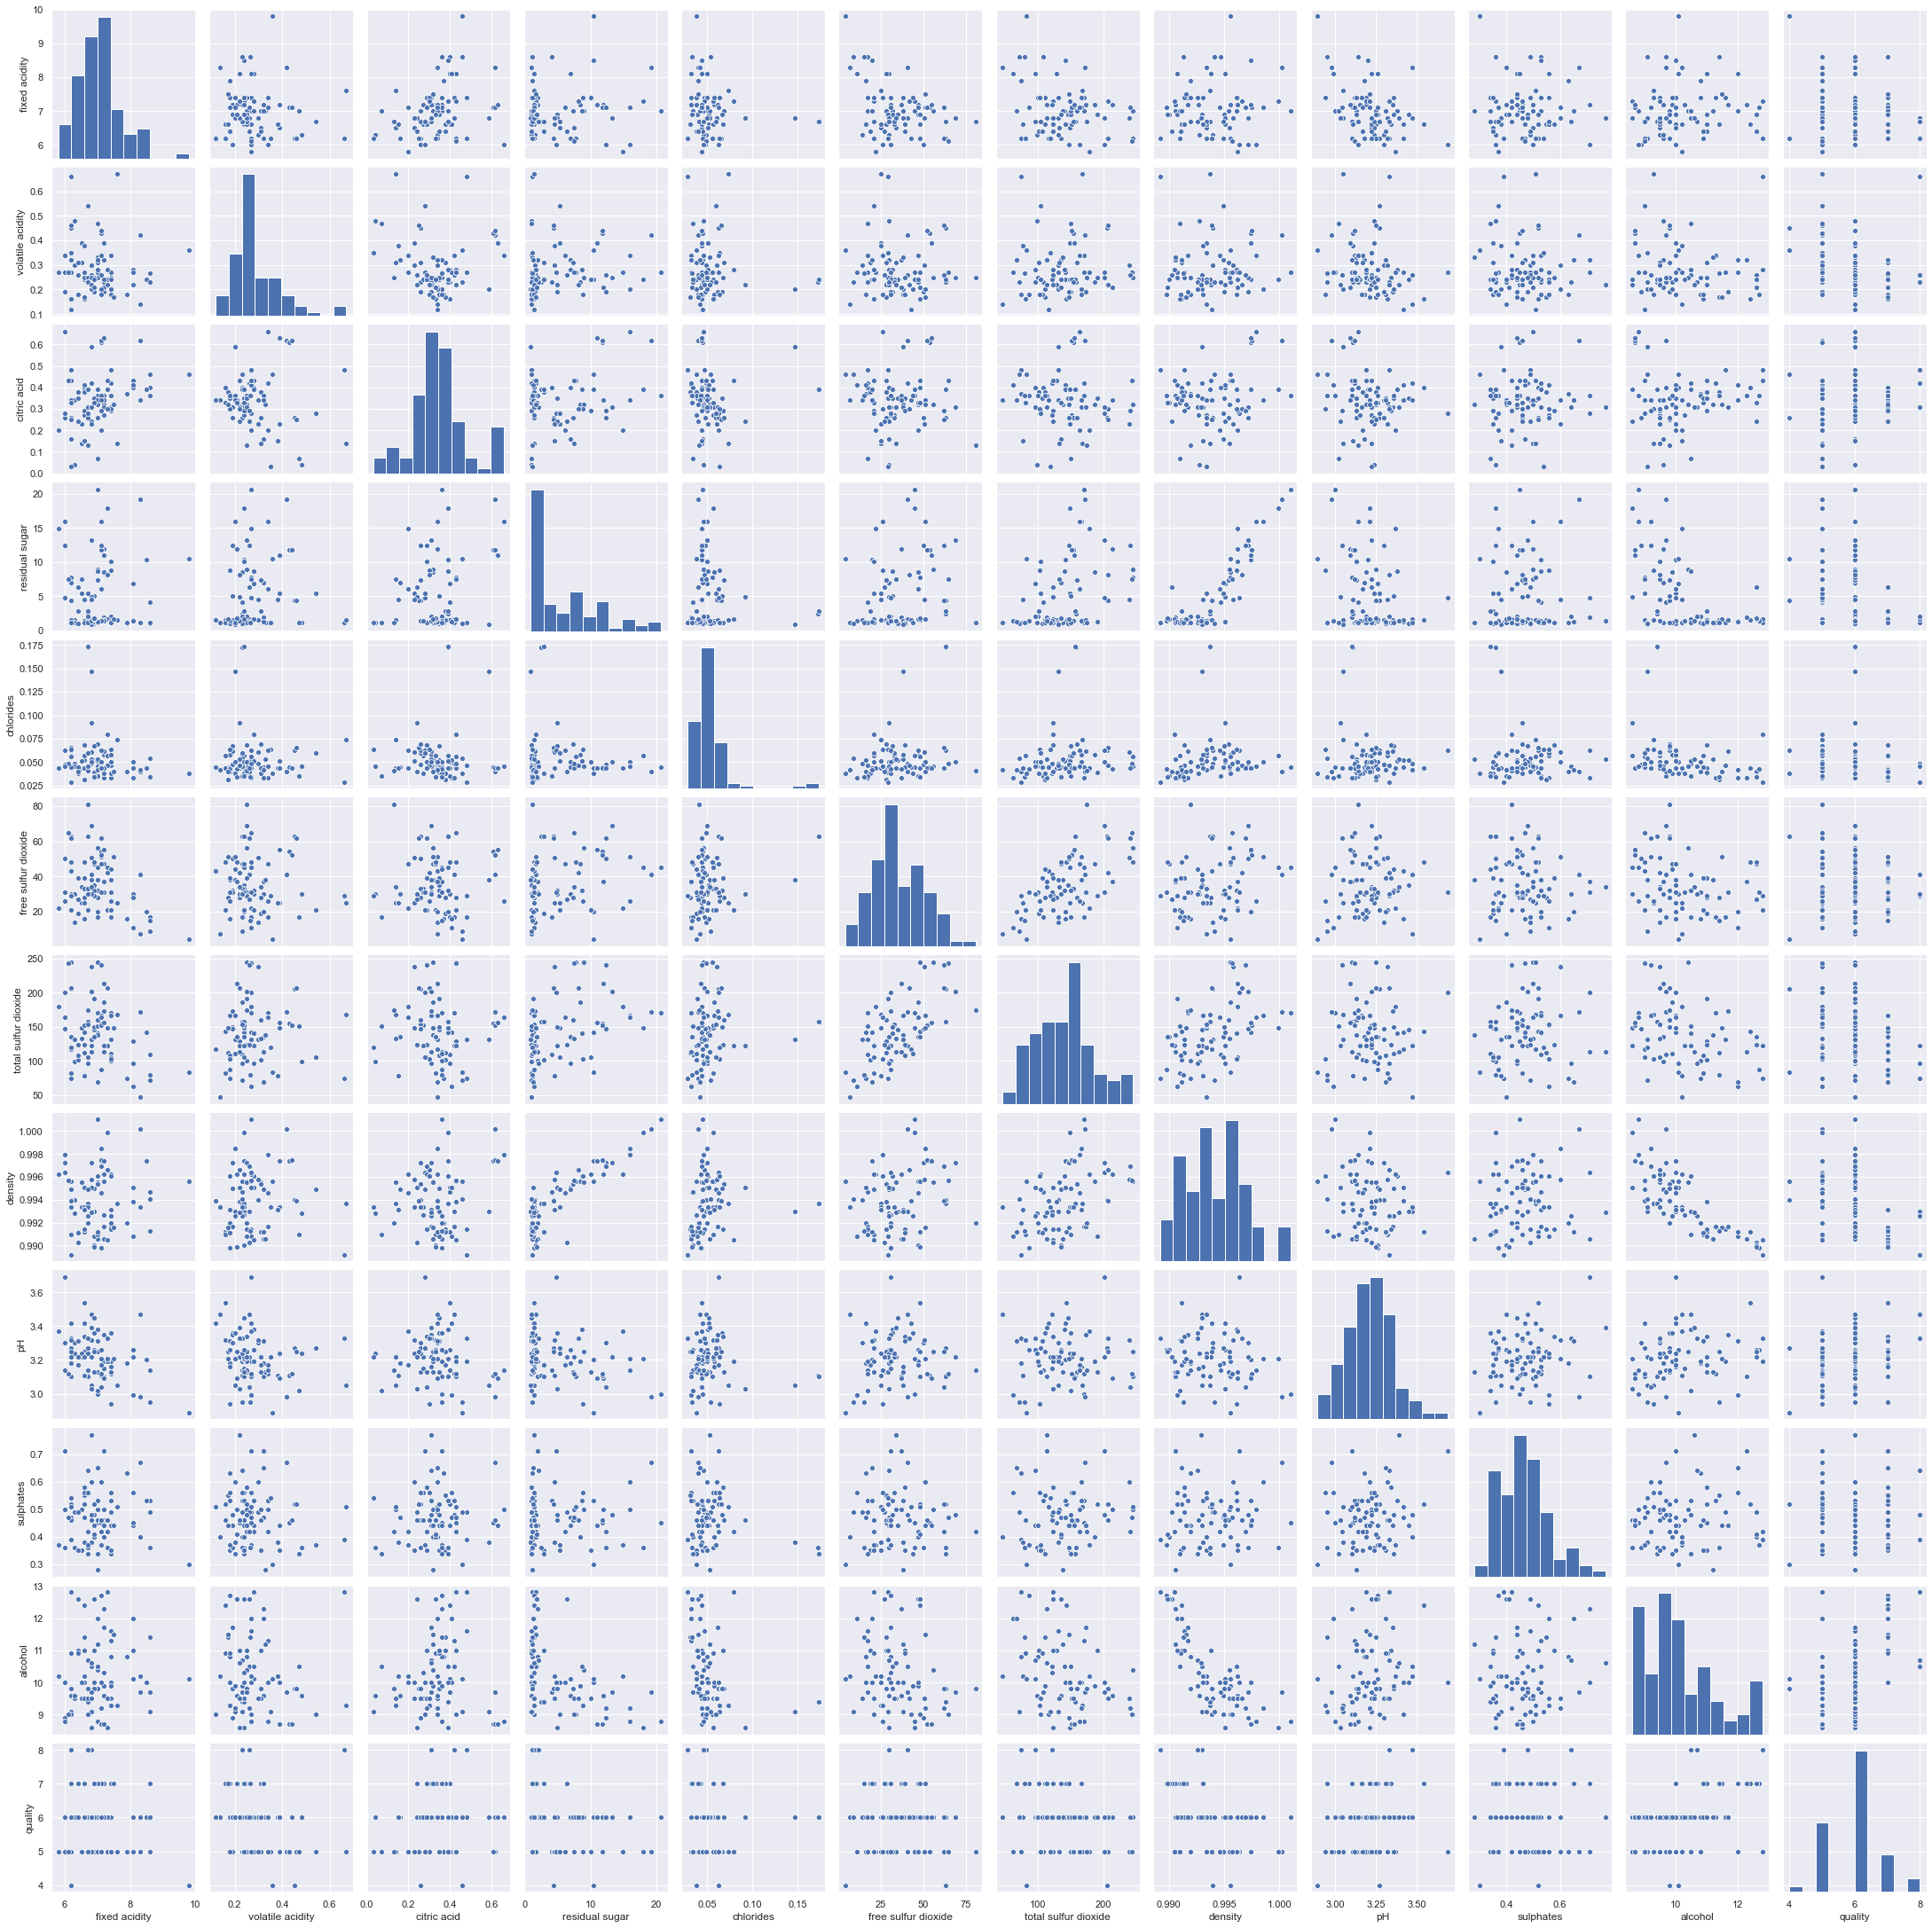

In [809]:
#6. Pairwise plot
sns.pairplot(df, vars=df.columns[:-1])

### Pairwise plots show relationships in a dataset that allows us to see both distribution of single features and relationships between two features.The histogram on the diagonal allows us to see the distribution of a single feature while the scatter plots on the upper and lower triangles show the relationship between two features. For instance the plot on 4th row and 5th column shows us the relationship between residual sugar and chloride content in the wine while the plot at 9,9 gives the histogram corresponding to pH of the wine.

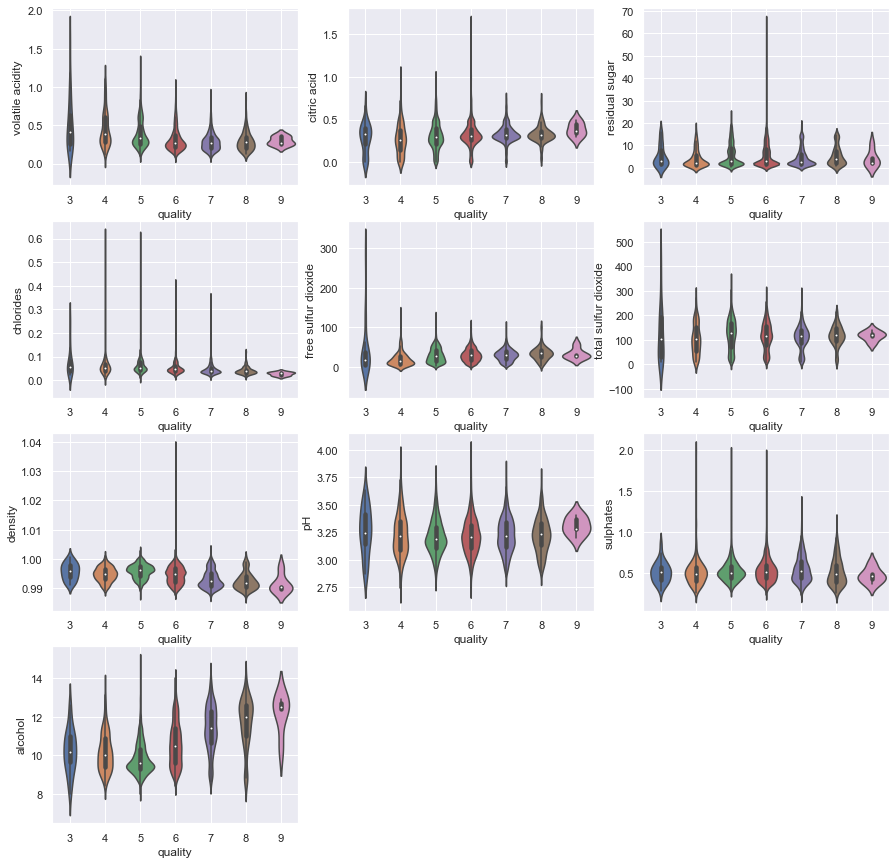

In [875]:
#7 Violin plots

i = 1
plt.figure(figsize=(15,15))
for col in df.columns.values[0:12]:
    plt.subplot(4,3,i)
    sns.violinplot(x="quality",y=df.columns[i],data=df,gridsize=100)
    plt.grid("True")
    i = i+1
    if i>10:
        break
    
plt.show()

### In the violin plot, we can find that the white dot at the center of violen gives median, the black bar in the violin gives interquartile range, the black lines stretched from the bar gives the lower/upper adjacent values. The top of black box gives us first quartile and the bottom as third quartile respectively. The lines streched far from top and bottom of violen tells us about the outlier points in the data set. For instance in chlorides corresponding to quality 6, median is occouring somewhere at 0.05 and there are too many outliers for it as evident from the streched black line at the top.

## Part B: KNN Algorithm 

In [855]:

# Computing Distance Metric function

def dist(d,test):
    index = d.index.to_numpy()
    d = d.to_numpy()
    e = np.zeros((len(d), 2)) # 2D array
    for i in range(len(d)):
        ed = np.sqrt(np.sum((d[i]-test)**2)) # Eucledian distance 
        e[i][0] = ed # First element as the eucledian distance
        e[i][1] = index[i] # Second element as the index value of the data item
    return e

# Computing nearest neibour function

def k_nearest(X_train,test,k):
    index = np.array([])
    dist_met = dist(X_train,test)
    dist_met = dist_met[dist_met[:,0].argsort()] # Sorting on the basis of eucledian distance values 
    arr = dist_met[:k] # Selecting the least k eucledian distance values
    for i in range(k): # Finding out the index of the least k eucledian distance values
        index = np.append(index,arr[i][1])
    index = list(index.astype(int)) # Typecasting to int
    return X_train.loc[index],index # Creating a new df containing the k nearest neibours of the test

# Prediction function using KNN

def k_predict(X_train,Y_train,test,k):
    
    df,index = k_nearest(X_train,test,k)
    a = Y_train[index].to_numpy()
    arr = np.zeros(10,int)
    for i in range(10):
        b = np.count_nonzero(a == i) 
        arr[i] = b
    return np.argmax(arr)



#### We are having quality of wine in 3-9 range, in order to reduce the above probelem of classsification as per quality we can modify the above problem to a 3 class problem where quality in the range [3,5] will be classified into low, [6,7] as medium  and [8,9] as high quality wine

In [854]:
# Creating 2 seperate dataframes which will be used for PCA and TSNE algorithm implementation
df_PCA = df.copy(deep='true')
df_TSNE = df.copy(deep='true')

# Turning it into a 3 class classification problem
df_PCA["quality"] = df_PCA.quality.apply(lambda r: 0 if r <= 5 else 1 if r <= 7 else 2)
df_TSNE["quality"] = df_TSNE.quality.apply(lambda r: 0 if r <= 5 else 1 if r <= 7 else 2)

## Part C: Classification using PCA

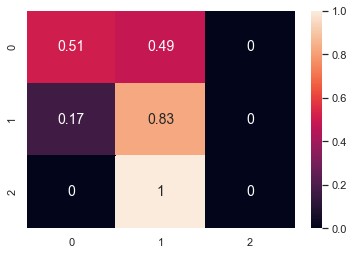

In [852]:
#Normalizing the Data set using minmax normalisation

for i in range(11):
    a = df_PCA.iloc[:, i:i+1]
    a = (a - a.min())/(a.max() - a.min())
    df_PCA.iloc[:, i:i+1] = a


df1 = df_PCA.iloc[:,0:11]
# Calculating mean and Covariance Matrix
mu = df1.sum()/6497
cov = 0

for i in range(6497):
    cov = cov + np.outer(np.array(df1.loc[i]-mu),(np.array(df1.loc[i]-mu)).transpose())  

# Eigen Decomposition    
eigvals, eigvecs = la.eig(cov)

P = np.matrix(eigvecs[:,0:3]) # Principal Components
X = np.matrix(df1.to_numpy())
Y = X*P # Projecting to new feature space
df1 = pd.DataFrame(data = Y,columns = [1,2,3])
df1["quality"] = df_PCA["quality"] 

#KNN algorithm
X = df1.iloc[:,0:3]
y = df1['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

true = np.array([])
predicted = np.array([])

for i in range(len(X_test)):
    a = k_predict(X_train,y_train,X_test[i],71)
    b = y_test[i]
    true = np.append(true,b)
    predicted = np.append(predicted,a)
    
matrix2 = confusion_matrix(true, predicted,labels=[0,1,2],normalize='true')
sns.heatmap(matrix2, annot=True)

## Part D: Classification via TSNE

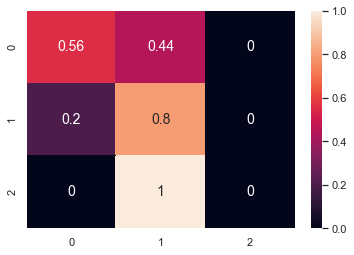

In [849]:
from sklearn.manifold import TSNE

#Normalizing the Data set using minmax normalisation

for i in range(11):
    a = df_TSNE.iloc[:, i:i+1]
    a = (a - a.min())/(a.max() - a.min())
    df_TSNE.iloc[:, i:i+1] = a
    
data = df_TSNE.iloc[:,0:11]
model = TSNE(n_components=3,random_state=0)
tsne_data = model.fit_transform(data)
tsne_df = pd.DataFrame(data = tsne_data,columns=[1,2,3])
tsne_df["quality"] = df_TSNE["quality"]

#KNN algorithm
X = tsne_df.iloc[:,0:3]
y = tsne_df['quality']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

true = np.array([])
predicted = np.array([])

for i in range(len(X_test)):
    a = k_predict(X_train,y_train,X_test[i],71)
    b = y_test[i]
    true = np.append(true,b)
    predicted = np.append(predicted,a)
    
matrix2 = confusion_matrix(true, predicted,labels=[0,1,2],normalize='true')
sns.heatmap(matrix2, annot=True)

### Conclusion

#### 1. The project began with a brief introduction followed by an exploratory data analysis which gave us insights into the data and its nature, relation and statistics. 

#### 2. The next step was implementing KNN algorithm which has been done from scratch without any support of libraries

#### 3. The problem statement was to predict the quality of wine which would take value from 3-9, so we further converted the problem into a 3 class problem to make the analysis a bit easier and compact.

#### 4. After that, the PCA algorithm has been implemented for dimension reduction, where dimensions from 11 have been reduced to just 3. This algorithm has also been written from scratch without any support of libraries. Looking at the confusion matrix we can see that low quality wines were predicted with 51% accuracy, medium quality wines with 83% accuracy and high quality wines were not predicted at all. 

#### 5. The next step was implementig TSNE algorithm which has been called from a python's sklearn library. It is a non-linear dimension reduction technique where dimensions from 11 have been reduced to 3. Looking at the confusion matrix we can see that low quality wines were predicted with 56% accuracy, medium quality wines with 80% accuracy and high quality wines were not predicted at all. 

#### 6. The reason for this poor performance metrics for KNN via both PCA and TSNE can be understood due to the reasons that -
#### a. There are too many outliers in the data as visible in EDA, bringing down the accuracy
#### b. Classes are not linearly seperable and on top of that applying dimension reduction techniques (PCA and TSNE) can be attributed to low performance metrics of KNN algorithm
#### c. The data set taken from UCI Machine learning repository looks at it as a regression problem, so clearly applying an algorithm like KNN was not a good choice.